In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
import statsmodels.api as sm
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
init_printing()
from IPython.display import display, Latex, HTML, Math
%matplotlib inline

Re-exam SMP E-2017
==

### Assignment 1

In [2]:
#a) We can do this in two ways: either integrate f or find the derivative of F. Here, I will show both.

# Integrate f
u = Symbol('u')
k = Symbol('k')
x = Symbol('x')

init_printing(use_unicode=False, wrap_line=False)

In [6]:
# Integrate f
u = Symbol('u')
k = Symbol('k')
x = Symbol('x')

f = k*u**2
integrate(f, (u,-1, x))

In [32]:
# Find the derivative of F
F = (1/3)*k*(x**3+1)
diff(F,x)

In [51]:
# b)
k_val = solve((1/3)*k*(1**3+1)-(1/3)*k*((-1)**3+1)-1, k)
print(Fraction(float(k_val[0])))

3/2


In [65]:
# c)
def F(x):
    return (1/3)*float(k_val[0])*(x**3+1)
print("P(X < 1/2) =", Fraction(F(1/2)), "=", round(float(F(1/2)), 3))
print("P(X > -1/4) =", Fraction(1-F(-1/4)), "=", round(float(1-F(-1/4)), 3))

P(X < 1/2) = 9/16 = 0.562
P(X > -1/4) = 65/128 = 0.508


In [75]:
# d)
print("E(X) =", integrate(float(k_val[0])*x*x**2, (x, -1, 1)))

E(X) = 0


In [77]:
print("Var(X) =", round(integrate(float(k_val[0])*(x**2)*x**2, (x, -1, 1))-
     integrate(float(k_val[0])*x*x**2, (x, -1, 1)), 3))

Var(X) = 0.6


### Assignment 2

In [91]:
A = 0.1
T_given_A = 0.95
T_given_notA = 0.15

# a)
notA = 1-A
print("a. P(\u00ACA) =", notA)

# b)
print("b. P(\u00ACT | A) =", round(1-T_given_A, 3))

# c)
print("c. P(\u00ACT | \u00ACA) =", round(1-T_given_notA, 3))

# d)
T = T_given_A*A+T_given_notA*notA
print("d. P(T) =", round(T, 3))

# e)
print("e. P(A | T) =", round(T_given_A*A/T, 3))

a. P(¬A) = 0.9
b. P(¬T | A) = 0.05
c. P(¬T | ¬A) = 0.85
d. P(T) = 0.23
e. P(A | T) = 0.413


### Assignment 3

In [103]:
pA = 0.75
nB = 60
sB = 41
pB = sB/nB

# a)
# Let X denote the event that player A hits his target. Then X follows a binomial distribution with p = 0.75
print('a. P(X \u2264 4) =', round(binom.cdf(4,10,pA), 3))

a. P(X ≤ 4) = 0.02


In [104]:
# b)
# Since we have two proportions, we can use test of difference between proportions:
nA = 60
sA = 60*pA

val = sm.stats.proportions_ztest([sA, sB], [nA, nB], value = None, alternative = 'larger')
stat = abs(round(val[0],2))
pvalue = round(val[1],4)

alpha = 0.05
crit = stats.norm.isf(alpha/2)

if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

Fail to reject since 0.2089 > 0.05


### Assignment 4

In [2]:
df = pd.read_excel('C:/Users/RIB/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Data_assignment_4.XLSX')

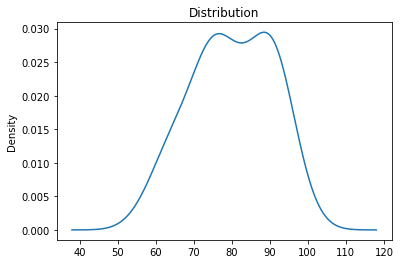

In [3]:
fig, ax = plt.subplots()
df2 = pd.read_excel('C:/Users/RIB/Downloads/scoringGrid-1834915.xlsx')
df3 = df2[df2['Final score'] > 49]
df3['Final score'].plot.kde(ax=ax, legend=False, title='Distribution');

In [4]:
df['Producer 1']

0         2.1162
1         2.5135
2         1.8137
3         0.8075
4         1.5554
5         0.7835
6         1.2408
7         2.5437
8         0.0104
9         1.9363
10        1.3427
11        3.6309
12        1.0839
13        1.7935
14        1.1715
15        2.2903
16        3.6370
17        3.5418
18        2.4258
19        2.3523
20        2.2032
21        2.5672
22        0.8744
23        3.0823
24        0.5893
25    21867.0000
26        2.2649
27        0.9554
28        2.1530
29        4.3498
Name: Producer 1, dtype: float64

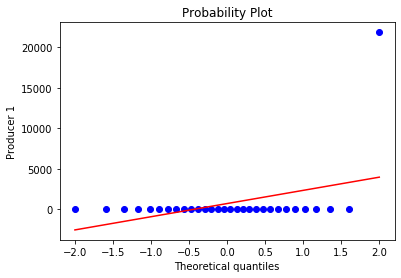

Skewness = 5.1995
Kurtosis = 25.0345


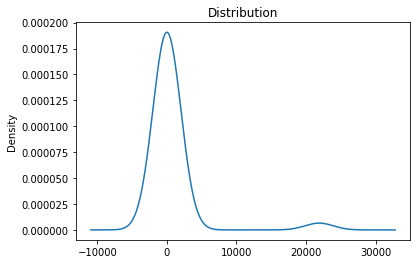

In [5]:
# b) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(df['Producer 1'], plot=plt)
plt.ylabel('Producer 1')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Producer 1']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Producer 1']),4)))
fig, ax = plt.subplots()
df['Producer 1'].plot.kde(ax=ax, legend=False, title='Distribution');

In [6]:
# There seems to be an outlier in supplier 1. We will replace this by the mean value of the remaining data.
q3, q1 = np.percentile(df['Producer 1'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier

In [7]:
average = df.loc[df['Producer 1'] < outlier, 'Producer 1'].mean()
df['Producer 1'] = np.where(df['Producer 1'] > outlier, average, df['Producer 1'])

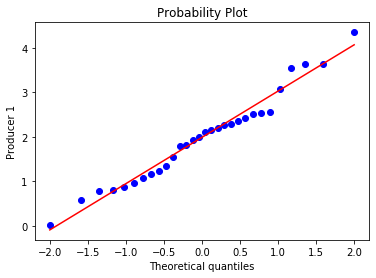

Skewness = 0.3199
Kurtosis = -0.2747


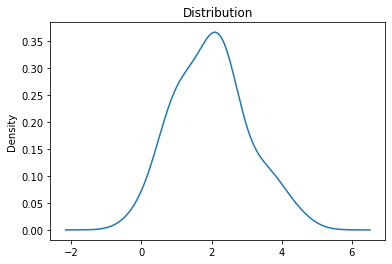

In [8]:
stats.probplot(df['Producer 1'], plot=plt)
plt.ylabel('Producer 1')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Producer 1']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Producer 1']),4)))
fig, ax = plt.subplots()
df['Producer 1'].plot.kde(ax=ax, legend=False, title='Distribution');

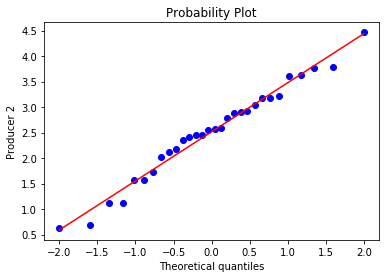

Skewness = -0.2306
Kurtosis = -0.3519


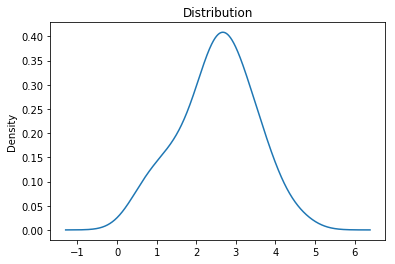

In [161]:
stats.probplot(df['Producer 2'], plot=plt)
plt.ylabel('Producer 2')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Producer 2']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Producer 2']),4)))
fig, ax = plt.subplots()
df['Producer 2'].plot.kde(ax=ax, legend=False, title='Distribution');

In [ ]:
# After replacing the outlier, we can now see that the data is normally distributed.

In [16]:
# b)
mean1 = round(np.mean(df['Producer 1']), 3)
std1 = round(np.std(df['Producer 1'], ddof = 1), 3)
var1 = round(np.var(df['Producer 1'], ddof = 1), 3)

mean2 = round(np.mean(df['Producer 2']), 3)
std2 = round(np.std(df['Producer 2'], ddof = 1), 3)
var2 = round(np.var(df['Producer 2'], ddof = 1), 3)

print('The average lifetime of the battery from producer 1 is', mean1, 'and the standard deviation is', std1,
      'and the variance is', var1)

print('The average lifetime of the battery from producer 2 is', mean2, 'and the standard deviation is', std2,
      'and the variance is', var2)

The average lifetime of the battery from producer 1 is 1.987 and the standard deviation is 1.014 and the variance is 1.029
The average lifetime of the battery from producer 2 is 2.515 and the standard deviation is 0.935 and the variance is 0.875


In [174]:
# c)

In [17]:
val = stats.ttest_ind(df['Producer 1'], df['Producer 2'])
alpha = 0.05
pvalue = round(val[1],4)
if pvalue < alpha:
    print("Reject since p-value = " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(pvalue) + ' > ' + repr(alpha))

Reject since p-value = 0.0405 < 0.05


In [ ]:
# We conclude that the average lifetime of the two batteries are different at alpha = 0.05

### Assignment 5

In [5]:
# a)

df = pd.DataFrame({'S1':[40, 360, 400], 'S2':[30, 570, 600], 'Sum':[70, 930, 1000]})
df = df.rename({0: 'Def', 1:'Non-Def', 2: 'Sum'})
df2 = df/1000
display(df)
display(df2)
alpha = 0.01

,S1,S2,Sum
Def,40,30,70
Non-Def,360,570,930
Sum,400,600,1000


,S1,S2,Sum
Def,0.04,0.03,0.07
Non-Def,0.36,0.57,0.93
Sum,0.40,0.60,1.00


In [3]:
# b)

print('P(S1 | Def) =', round(df2.loc['Def', 'S1']/df2.loc['Def', 'Sum'], 3))

P(S1 | Def) = 0.571


In [6]:
# c) I interpret 'very significantly' as alpha = 0.01

obs = np.array([
    [40, 30],
    [360,570]
    
])
stat, pvalue, dof, ex = stats.chi2_contingency(obs, correction=True)

if pvalue < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))
print(obs)
print('--------')
print (ex)

Reject since p-value = 0.0036 < 0.01
[[ 40  30]
 [360 570]]
--------
[[ 28.  42.]
 [372. 558.]]


### Assignment 6

In [221]:
l = 2*4

# a)
print('P(X > 10) =', round(poisson.sf(10, l), 4))


P(X > 10) = 0.1841


In [3]:
# b)
l = 3*4
print('P(9 \u2264 X \u2264 11) =', round(poisson.cdf(11, l) - poisson.cdf(8, l), 4))

P(9 ≤ X ≤ 11) = 0.3066


In [227]:
# c)
# Let X denote the time in minutes until the first call. Then X follows a Exponential distribution.
rate = 1/4
print('P(X \u2264 0.5 min) = ', round(stats.expon.cdf(0.5, 0, rate), 4))

P(X ≤ 0.5 min) =  0.8647


In [228]:
# d)
print('P(X > 2 min) = ', round(stats.expon.sf(2, 0, rate), 4))


P(X > 2 min) =  0.0003
